In [76]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [77]:
dataset = pd.concat(map(pd.read_csv, ['states0.csv', 'states1.csv', 'states2.csv', 'states3.csv', 'states4.csv', 'states5.csv', 'states6.csv', 'states7.csv', 'states8.csv', 'states9.csv']))
dataset.head()
#Another method is glob.glob('/content/*.csv')

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [78]:
dataset.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [79]:
dataset.drop(columns=dataset.columns[0],axis=1,inplace=True)
dataset.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [80]:
dataset.tail()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F
5,Wisconsin,5742117,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%,$53898.889208633096,2851385M_2890732F


In [81]:
dataset.shape

(60, 10)

In [82]:
dataset.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      5
Income       0
GenderPop    0
dtype: int64

In [83]:
dataset['Pacific'] = dataset['Pacific'].fillna(dataset['Pacific'].mode()[0])
dataset.isnull().sum()

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      0
Income       0
GenderPop    0
dtype: int64

### Scatterplot that shows average income in a state vs proportion of women in that state.

In [84]:
dataset[['Male', 'Female']] = dataset.GenderPop.str.split("_", expand = True)
dataset["Male"] = dataset["Male"].str.replace("M","")
dataset["Female"] = dataset["Female"].str.replace("F","")
dataset.drop(["GenderPop"], axis=1,  inplace=True)
dataset.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135,19334329


In [85]:
dataset["Income"] = dataset["Income"].str.replace("$","")
dataset['Income'] = pd.to_numeric(dataset['Income'])
dataset.head()

C:\Users\hamza\AppData\Local\Temp/ipykernel_22244/2467120737.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset["Income"] = dataset["Income"].str.replace("$","")


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Male,Female
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329


In [86]:
dataset['Female'] = pd.to_numeric(dataset['Female']) #string to value 
dataset['Male'] = pd.to_numeric(dataset['Male'])
dataset=dataset.drop_duplicates()

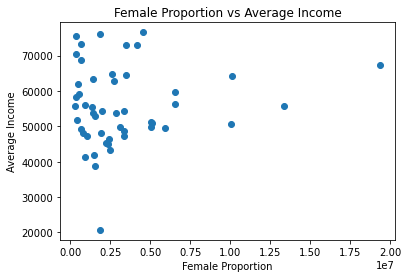

In [87]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Female'],dataset["Income"])
plt.title("Female Proportion vs Average Income")
plt.xlabel("Female Proportion")
plt.ylabel("Average Income")
plt.show()

In [88]:
dataset.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income      float64
Male          int64
Female      float64
dtype: object

In [89]:
dataset.shape

(51, 11)

In [90]:
dataset.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Male', 'Female'],
      dtype='object')

### Histogram 

In [99]:
race = ["Hispanic", "White", "Black", "Native", "Asian", "Pacific"]

for col in race:
    dataset[col]=dataset[col].replace("%","")
dataset.dtypes

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Male          int64
Female      float64
dtype: object

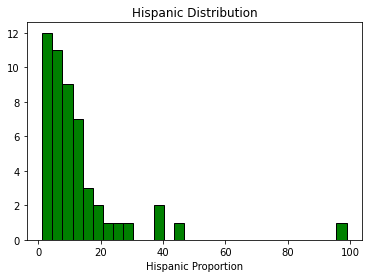

In [103]:
plt.hist(dataset[race[0]], color='green', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

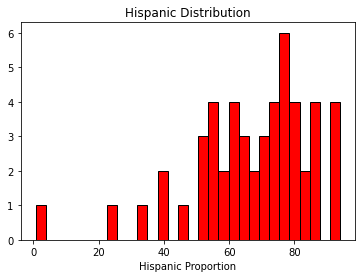

In [104]:
plt.hist(dataset[race[1]], color='red', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

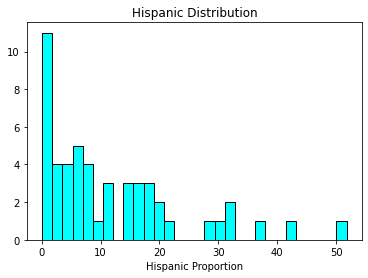

In [105]:
plt.hist(dataset[race[2]], color='cyan', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

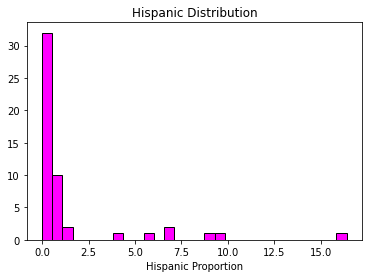

In [106]:
plt.hist(dataset[race[3]], color='magenta', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

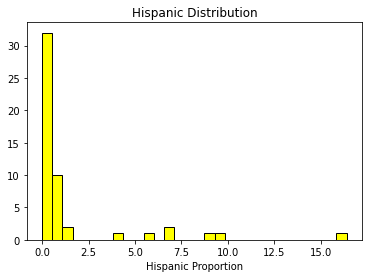

In [108]:
plt.hist(dataset[race[3]], color='yellow', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

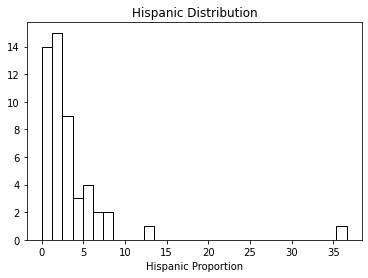

In [109]:
plt.hist(dataset[race[4]], color='white', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()

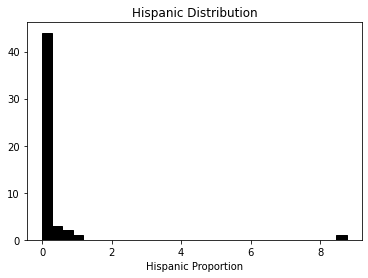

In [110]:
plt.hist(dataset[race[5]], color='black', edgecolor='black', bins=30)
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic Proportion') 
plt.show()